# Introduction

Every cell in the body is a direct descendant of the fertilized egg from which each of us developed. Through time the DNA sequence of every cell acquires a set of differences from its progenitor, this variations are called somatic mutations {stratton, yates}. All cancer arise as a result of a somatic mutation, so an approach to unveil the mysteries of cancer is through the catalogue of mutations a cancer genome has {stratton, zainalA}. 

Somatic mutations have been classified depending on certain characteristics, such as location,  mutations can occur all over the genome, that can be a simple way to determine if they will affect the protein structure and a basic approach to determine the functional impact the variation will have {lodish, tate, reva}. In cancer is important to classify mutations as the ones that have been positively selected or “driver” mutations, which confer an advantage to the cell and “passenger” mutations, this type haven't been selected, they just happened to be there {stratton, zainalA}.  

To understand cancer, several models have been developed, it has been seen as an evolutionary process, it is a series events, constant acquisition of mutations and natural selection, these processes mark the genome, and a cancer's life history is encrypted in the somatic mutations that we can find in its genome {lean, zainalB, yates}. 

Knowing the history of a tumor is important, because as in evolution, it lets us understand the subpopulations of cells present in a tumor and the biological processes, and can be used in a clinical decision {fisher}. In fact the catalogue of mutations have been used to tell the history of tumors, to reconstruct a phylogeny of the diverse clone subpopulations, which its being recognized to have value making clinical decisions {popic, ricketts}.

An important thing in history is time, knowing how long have been the tumor evolving can help in diagnosis, tumor classification, prognosis and treatment. The approach described to determine the age of a tumor based on somatic mutations with low or neutral selective pressure can help to understand mutational process like co-occurrence and mutual exclusivity, that can lead to new functional interactions, which are important not only for understanding cancer, but also in clinical decisions, it can help in the selection of multi targeted anti-tumor therapies, co-mutations suggest combination of drugs might be effective while mutual exclusion indicate combinations likely won't work, this is specially important because treatments focusing in a unique alteration can lead to a single cell that is resistant to therapy proliferates, followed by relapse, increasing the mortality {stratton, ochoa, tiam}.

Studies show that the accumulation of mutations can be accelerated due to genome instability, increased sensitivity to mutagenic agents and breakdown of genomic maintenance {hanahan, negrini}, according to this we can make the assumption that the mutations present before the tumor started to evolve are negligible in number. 

The majority of molecular changes are caused by random fixation of selectively neutral mutants {kimura}, correspondingly in cancer the majority of mutations do not confer advantage, it means they are not detectable under selection {cannataro, piraino}. Knowing this we can assume passenger mutations are useful to determine the age of a tumor because most mutations in the cancer genome are of this kind.

As the evolutive history, the age of a tumor can be inferred from the catalogue of mutations, in this paper we will present a method to determine the age of a tumor in terms of the somatic mutations with low or no selection pressure present in the cancer genome. 

Various measurements that could help to determine the tumor age where performed in breast cancer mutation assessor analysis data \cite{data, reva}. Based on location that might have low or neutral functional impact, silent, intergenic regions and intron mutations where selected.

# Methods and Data:

Data: All data used in this paper is available on line at https://gdac.broadinstitute.org;  The dataset used in this paper is the BRCA-TP.maf.annotated {data} file of the breast invasive carcinoma. It can be found in the mutation analysis section, mutation assessor link, it opens a widow, look for "methods and data" title, on the download results drop down select analysis results, where the file mentioned before can be downloaded. This is a mutations annotation file (MAF), where each entry is a mutation and its characteristics, this file contains 76673 entries of 977 samples, for each mutation there are 356 variables. 

Data preprocess Data was subjected to an analysis under the scope of the project objectives to select the variables that could be used to determine the age of the tumor. From 356 variables, nine were selected. The variables selected helped us know different characteristics of the mutation including: location, classification and functional impact {reva}.

Various measurements based on the count of passenger mutations were performed. Variant classification was the selection criteria to determine the mutations as passenger, the measurements consisted on counting the occurrence of a certain type of mutation by sample. Based on the location of the mutation and the functional impact score (FIS) determined by {reva}, we took the ones that might have low or neutral functional impact, from the classifications presented in {table 1}.  Silent, intergenic region (IGR), intron mutations (int) and missense mutations with less than 1.9 functional impact score (FIS) {reva}, were selected as the ones that could have least impact on the cell function and have less selective pressure on the tumor evolution, and so the ones to be used as temporal measurement of the tumor. 


#### Tabla 1 <br>

|Mutation type | Effect | Predicted functional Impact|
| ------------ | ------ |--------------------------- | 
| Nonsense | Non-synonymous  | medium - high         |
| Missense | Non-synonymous  | neutral - low - high  |
| Silent   | Synonymous      | neutral - low         | 
| Nonstop  | Non-synonymous  | medium - high         |
| In frame indels  | Non-synonymous | medium - high | 
| Frame shift indels | Non-synonymous | medium - high | 
| Start codon indels | Affects translation | medium-high|
| Stop codon indels | Affects translation | medium-high|
| Splice site | Affects translation | medium - high |
| Intergenic regions | Non-coding | neutral - low |
| Intron | Non-coding  | neutral - low |
| De Novo start out of frame | Non-synonymous  | medium-high |
| De Novo start in frame | Non-synonymous | medium-high | 
| 5' Flank | Non-coding, gene expression | medium-high |
| 3' and 5' Untranscribed regions | Non-coding, gene expression | medium-high |


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

sns.set()
sns.set_palette(sns.color_palette('colorblind'))
sns.set_style("whitegrid") 

In [21]:
# Importando el archivo .maf anotado (Obtenido de: http://firebrowse.org)
archivomaf = 'BRCA-TP.maf.annotated'
#encoding = "ISO-8859-1" (Se obtenia un error, se encontró que agregando esto, funciono)
mafData = pd.read_csv(archivomaf, sep='\t', encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (50,57,62,63,67,70,72,73,75,76,105,108,109,113,122,124,131,132,135,136,145,150,151,163,164,179,205,302,303,304,318,319,320,354) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data preprocess:

In [22]:
print('Mutaciones: ' + str(mafData.shape[0]) + ' Variables: ' + str(mafData.shape[1]))

Mutaciones: 76673 Variables: 356


In [23]:
# Una copia de las columnas que quiero en un nuevo DataFrame:
mafToSort = mafData[['Hugo_Symbol', 'Chromosome', 'Variant_Classification',
       'Variant_Type', 'i_HGNC_LocusType', 'is_coding', 'patient',
       'MA_Func.Impact', 'MA_FI.score']].copy()

# Cambiandole el nombre de MA_Func.Impact a MA_Func_Impact y MA_FI.score a MA_FI_score:
mafToSort.columns = ['Hugo_Symbol', 'Chromosome', 'Variant_Classification',
       'Variant_Type', 'i_HGNC_LocusType', 'is_coding', 'patient',
       'MA_Func_Impact', 'MA_FI_score']

print('Mutaciones: ' + str(mafToSort.shape[0]) + ' Variables: ' + str(mafToSort.shape[1]))

# Organizando por identificación de paciente:
data_SortPatient = mafToSort.sort_values(['patient','Variant_Classification', 'i_HGNC_LocusType'])

# Los NaN van a ser '-'
data = data_SortPatient.fillna('0')

# Guardo el archivo: 
# Con las columnas que quiero
# Ordenado por: paciente, Variant Classification y locus type
data_SortPatient.to_csv('maf_OrdenadoxPaciente.txt', sep='\t', encoding='utf-8')
#data_SortPatient.describe()

Mutaciones: 76673 Variables: 9


### Data process:

In [24]:
# Si se necesita cargar de nuevo el archivo:
maf = 'maf_OrdenadoxPaciente.txt'
data = pd.read_csv(maf, sep='\t')

In [25]:
dg = data.groupby('patient')
m = {'patient':0, 'mut tot':0, 'silent':0, 'igr':0, 'intron':0, 'low&neutral FI':0, 'Score_Menor':0}
Paciente = []
mut_tot = []
silent_mut = []
intergenic = []
intron_mut = []
suma_s_igr_int = []
lynfi = []
fisMen19 = []
l = 0
n = 0
ln = 0
smenor19=0

for (patient, Pgroup) in dg:
    #print('\n', patient, '\n')
    m['patient'] = patient
    m['mut tot'] = Pgroup.shape[0]
    #print('mut tot:',Pgroup.shape[0])
    vgg = Pgroup.groupby('Variant_Classification')
    fig = Pgroup.groupby('MA_Func_Impact')
    fis = Pgroup.groupby('MA_FI_score')
    for (Variant_Classification, Vgroup) in vgg:
        if Variant_Classification == 'Silent':
            m['silent'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification == 'IGR':
            m['igr'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification =='Intron':
            m['intron'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
            #print(Variant_Classification, ':', Vgroup.shape[0])
    for(MA_Func_Impact, Fgroup) in fig:
        if MA_Func_Impact == 'low' :
            l = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        if MA_Func_Impact == 'neutral':
            n = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        ln = l+n
        m['low&neutral FI'] = ln
        #print(MA_Func_Impact,':', Fgroup.shape[0]) 
    for(MA_FI_score, FSgroup) in fis:
        if float(MA_FI_score) <= 1.9 and float(MA_FI_score) > 1.9 :
            m['Score_Menor']=FSgroup.shape[0]
            
    tt = m['silent'] + m['igr'] + m['intron']     
    Paciente.append(m['patient'])
    mut_tot.append(m['mut tot'])
    silent_mut.append(m['silent'])
    intergenic.append(m['igr'])
    intron_mut.append(m['intron'])
    lynfi.append(m['low&neutral FI'])
    fisMen19.append(m['Score_Menor'])
    suma_s_igr_int.append(tt)

paraDf = {'Patient_Id': Paciente, 'Total_Mutations': mut_tot, 'Silent_Mutations': silent_mut, 'IGR_Mutations': intergenic,
         'Intron_Mut': intron_mut, 'Low_Neutral_FI': lynfi, 'Score_Menor': fisMen19 , 'Suma_S_IGR_IN': suma_s_igr_int}

medidas = pd.DataFrame(paraDf)
# Guardando los datos sacados a un archivo de texto.
medidas.to_csv('medidasxpaciente.txt', sep='\t', encoding='utf-8')

# Results

Although all mutations can have an impact on the cell, the majority of them are neutral {liu}, so we can assume that those mutations that do not change amino acid in the protein sequence, that are in non coding regions and/or far from known gene control regions, have mostly low or neutral impact. Looking to the types of mutation and its characteristics on {table 1}. 

Silent, intergenic region (IGR), intron mutations (int) and missense mutations with less than 1.9 functional impact score (FIS) {reva}, were selected as the ones that could have least impact on the cell function and have less selective pressure on the tumor evolution, and so the ones to be used as temporal measurement of the tumor. 

The measurements to determine the tumor age where used in a breast cancer mutation assessor analysis dataset {data}. The data was analyzed and the outliers were identified by box and whiskers plots, and appropriately managed with the interquartile range (IQR) method, those samples that where below quantile 25 minus 1.5*IQR or above quantile 75 plus 1.5*IQR were not taken into account. For each sample, which has a unique identification total, silent, intergenic region and intron mutations, as well as mutations with low or neutral functional impact (FIS < 1.9) \cite{reva} were counted with a python algorithm developed for this purpose. 

General statistics of the measurements, see {table 2}, showed that IGR and intron mutations counts were too low to be used as an appropriate temporal meassurement by itself, for this reason, the summation of intergenic, intron and silent mutation was taken as a single measurement, leaving us with three different measurements to assess, low FIS (functional impact score below 1.9), sum (summation of IGR, intron and silent mutations) and silent mutations.  

A simple linear regression was performed between measurements, a positive correlation was found for both regressions. The correlation between sum and low FIS didn't show a lot of difference with the correlation between the other two measurements, because of the similarity, the simplest measurement, that means only silent mutations, was used. The correlation between silent and low FIS showed an R value of 0.75, see {figure 1}, from which we can infer that two different types of mutation with the same predicted low or neutral impact on the cell are occurring similarly. A positive correlation was also found between each measurement and the total mutations,see {figure 2} (silent vs total: slope=0.2, R=0.86 and low FIS: slope=0.3, R=0.87)  allowing us to use them as an approach to determine the tumor age in terms of neutral and low impact mutations. 


In [8]:
medsOrden = medidas.sort_values(by=['Total_Mutations', 'Patient_Id'], ascending=False)

In [9]:
# Quite los nombres de los pacientes, para poder tratar todo como int
soloMeds = medsOrden[['IGR_Mutations', 'Intron_Mut', 'Low_Neutral_FI',
                      'Silent_Mutations', 'Suma_S_IGR_IN', 'Total_Mutations']].copy()

In [10]:
# Zscore
z = np.abs(stats.zscore(soloMeds))
#print(z)

#Inter Quartile Range:
Q1 = soloMeds.quantile(0.25)
Q3 = soloMeds.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

# sacando solo los que cumplen con el z-score:
soloMeds_out_z = soloMeds[(z < 3).all(axis=1) | (z > -3).all(axis=1)]
#print(soloMeds.shape)
#print(soloMeds_out_z.shape)

# sacando solo los que cumplen con el IQR:
soloMeds_out = soloMeds[~((soloMeds < (Q1 - 1.5 * IQR)) |(soloMeds > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(soloMeds.shape)
#print (soloMeds_out.shape)


#### Tabla 2

In [11]:
print('General description of the data: ')
soloMeds_out.describe()

General description of the data: 


,IGR_Mutations,Intron_Mut,Low_Neutral_FI,Silent_Mutations,Suma_S_IGR_IN,Total_Mutations
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1.240000,1.272500,13.470000,8.723750,11.236250,40.355000
std,0.531746,0.584098,8.587566,5.657291,5.741659,24.047179
min,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
25%,1.000000,1.000000,7.000000,5.000000,7.000000,23.000000
50%,1.000000,1.000000,11.000000,7.000000,10.000000,33.000000
75%,1.000000,1.000000,18.000000,12.000000,14.000000,53.000000
max,3.000000,3.000000,44.000000,27.000000,30.000000,125.000000


## Figure 1

Silent vs Low FIS
R value: 0.741091217028
P value: 3.26468542042e-140
Std error: 0.0355480191112
y = 1.10842002424x + 1.01551550262


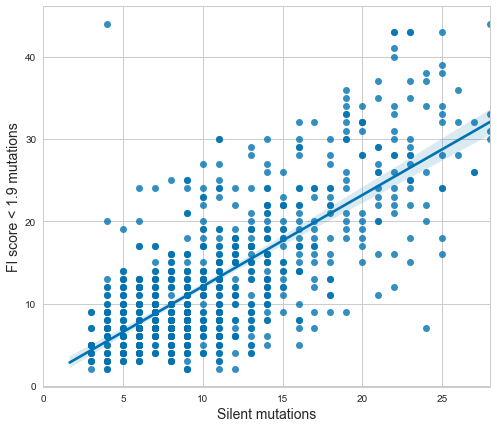

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(8)
fig.set_figheight(7)

slope, intercept, r_value, p_value, std_err = stats.linregress(soloMeds_out['Suma_S_IGR_IN'],soloMeds_out['Low_Neutral_FI'])
sns.regplot(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

#axs.legend()

plt.ylabel('FI score < 1.9 mutations', fontsize=14)
plt.xlabel('Silent mutations', fontsize=14)
#print(cor7)
plt.xlim(0,max(soloMeds_out.Silent_Mutations)+1)
#plt.title('Silent vs Low FIS')
print('Silent vs Low FIS')
print('R value: ' + str(r_value))
print('P value: ' + str(p_value))
print('Std error: ' + str(std_err))
print('y = ' + str(slope)+ 'x + ' + str(intercept))

plt.savefig('SumaVsFISFinal.png')

## Figure 2

LinregressResult(slope=0.20346049190453433, intercept=3.0256018491925172, rvalue=0.85213195574366629, pvalue=1.2619624333807579e-226, stderr=0.0044232849658663214)
LinregressResult(slope=0.31342531103367544, intercept=0.82172157323602946, rvalue=0.87766368862058319, pvalue=4.1249176322128421e-257, stderr=0.0060588623198319655)


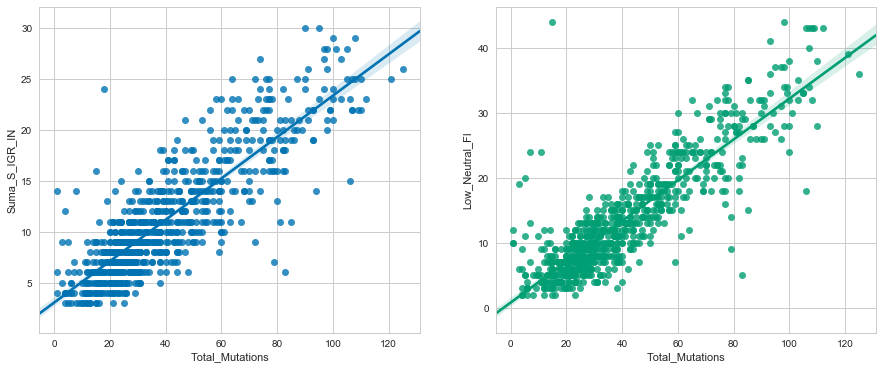

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(6)

sns.regplot(soloMeds_out.Total_Mutations, soloMeds_out.Suma_S_IGR_IN, ax=axs[0])
sns.regplot(soloMeds_out.Total_Mutations, soloMeds_out.Low_Neutral_FI, ax=axs[1])

r_value  = stats.linregress(soloMeds_out.Total_Mutations, soloMeds_out.Suma_S_IGR_IN)
r_value1  = stats.linregress(soloMeds_out.Total_Mutations, soloMeds_out.Low_Neutral_FI)

plt.savefig('TotalesFin.png')
print(r_value)
print(r_value1)

# Conclusion


Gigantic global efforts have lead us to understand a little better how cancer develop and how can we fight against it. From this hundreds of gigabytes of data have been put available on-line. Understanding cancer as an evolutionary process is not new \cite{cairns}, but the availability of data is recent and it has to be exploited. Efforts to uncover the evolutionary history of tumors from the catalogue of mutations, mainly in driver mutations, have been done. This study presents a simple approach to determine the age of a tumor for breast cancer, but it doesn't mean that the method can't be used in other datasets of different types of cancer.



# Referencias
1. Stratton, M., Campell, P., Futreal, P.: The canger genome. Nature 485, 719{724 (2009)
2. Yates, L., Campbell, P.: Evolution of the cancer genome. Nature Reviews Genetics 13, 795{806 (2012)
3. Nik-Zainal, S., Alexandrov, L., Wedge, D., Van Loo, P., Greenman, C., Raine, K., et al: Mutational processes molding the genome of 21 breast cancers. Cell 149, 979-993 (2012)
4. Lodish, H., Berk, A., Zipursky, S., Matsudaira, P., Baltimore, D., Darnell, J.: Mutations: Types and causes. In: Tenney, S. (ed.) Molecular Cell Biology, 4th edn., pp. 53{76. W.H. Freeman and Company, New York (2000) 
5. Tate, J., Bamford, S., Jubb, H., Sondka, Z., Beare, D., Bindal, N., et al: Cosmic: the catalogue of somatic mutations in cancer. Nucleic Acids Research 47, 941-947 (2019) 
6. Reva, B., Antiipin, Y., Sander, C.: Predicting the functional impact of mutations: application to cancer genomics. Nucleic Acids Research 39 (2011)
7. Lean, C., Plutynski, A.: The evolution of failure: explaining cancer as an evolutionary process. Biology and philosophy 31, 39-57 (2015)
8. Nik-Zainal, S., Van Loo, P., Wedge, D., Alexandrov, L., Greenman, C., Wai Lau, K., et al: The life history of 21 breast cancers. Cell 149, 994-1007 (2012)
9. Fisher, R., Pusztai, L., Swanton, C.: Cancer heterogeneity: implications for targeted therapeutics. British journal of cancer 108, 479-485 (2013)
10. Popic, V., Salari, R., Hajirasouliha, I., Kashef-Haghighi, D., West, R., Batzoglou, S.: Fast and scalable inference of multi-sample cancer lineages. Genome Biology 16 (2015)
11. Ricketts, C., Popic, V., Toosi, H., Hajirasouliha, I.: Using lichee and bamse for reconstructing cancer phylogenetic trees. Current protocols in bioinformatics, 49 (2018). doi: 10.1002/cpbi.49
12. Ochoa, S., Martinez-Perez, E., Zea, D., Molina-Vila, M., Marino-Buslje, C.: Co-mutation and exclusion analysis in human tumors, a means for cancer biology studies and treatment design. Human mutation 40, 413-425 (2019)
13. Tinahai, T., Olson, S., Whitacre, J., Harding, A.: The origins of cancer robustness and evolvability. Integr. Biol. 3, 17-30 (2011). doi:10.1039/c0ib00046a
14. Hanahan, D., Weinberg, R.: Halmarks of cancer: the next generation. Cell 144, 646-674 (2011)
15. Negrini, S., Gorgoulis, V., Halazonetis, T.: Genomic inestability an evolving hallmark in cancer. Nature Reviews Molecular Cell Biology 11, 220-228 (2010)
16. Kimura, M.: The neutral theory of molecular evolution: a review of recent evidence. The japanese journal of genetics 66, 367-386 (1991)
17. Cannataro, V., Townsed, J.: Neutral theory and the somatic evolution of cancer. Molecular biology and evolution 35, 1308{1315 (2018)
18. Piraino, S., Furney, S.: Beyond the exome: the role of non-coding somatic mutations in cancer. Annals of oncology 27, 240-248 (2016)
19. Institute, B., Center, T.G.D.A.: Mutation assessor. Broad Institute of MIT and Harvard (2016). doi:10.7908/C1F18Z2Z
20. Choi, Y., Sims, G., Murphy, S., Miller, J., Chan, A.: Predicting the functional effect of amino acid substitutions and indels. PLoS ONE, 46688 (2012). doi:10.1371/journal.pone.0046688
21. Azia, A., Uversky, V., Horovitz, A., Unger, R.: The effects of mutations on protein function: a comparative study of three databases of mutations in humans. Israel journal of chemistry 53, 217-226 (2013)
22. Liu, M., Watson, L., Zhang, L.: Classfication of mutations by functional impact type: gain of function, loss of function, and switch of function. In: Basu, M., Pan, Y., Wang, J. (eds.) BioinformaticsResearch and Applications, pp. 236-242 (2014). Springer, Cham
23. Cairns, J.: Mutation selection and the natural history of cancer. Nature 255, 197-200 (1975)



# Suplementary Data

In [159]:
merged = soloMeds_out.merge(medsOrden).drop_duplicates()
merged = merged[['Low_Neutral_FI', 'Suma_S_IGR_IN', 'Patient_Id', 'Total_Mutations']]
merged = merged.sort_values(by=['Suma_S_IGR_IN', 'Low_Neutral_FI'])
merged['diffs'] = abs(merged['Low_Neutral_FI'] - merged['Suma_S_IGR_IN'])
#merged.to_excel('ListOfAges.xlsx')
#diffsSort = merged['diffs'].sort_values()
#sns.plt.scatter(np.arange(0, len(diffsSort)), diffsSort)

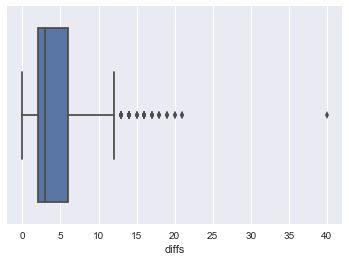

In [162]:
sns.boxplot(merged.diffs)

In [163]:
Q1 = merged['diffs'].quantile(0.25)
Q3 = merged['diffs'].quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
diffsIQR = merged[~((merged['diffs'] < (Q1 - 1.5 * IQR)) |(merged['diffs'] > (Q3 + 1.5 * IQR)))]
diffsIQR.shape

(748, 5)

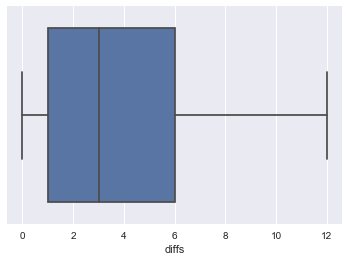

In [148]:
sns.boxplot(diffsIQR.diffs)

In [149]:
diffsIQR.describe()

,Low_Neutral_FI,Suma_S_IGR_IN,Total_Mutations,diffs
count,748.000000,748.000000,748.000000,748.000000
mean,12.243316,10.926471,38.101604,3.723262
std,7.170865,5.552350,21.901455,2.883205
min,2.000000,3.000000,1.000000,0.000000
25%,7.000000,7.000000,23.000000,1.000000
50%,10.000000,9.000000,32.000000,3.000000
75%,16.000000,14.000000,49.000000,6.000000
max,36.000000,30.000000,125.000000,12.000000


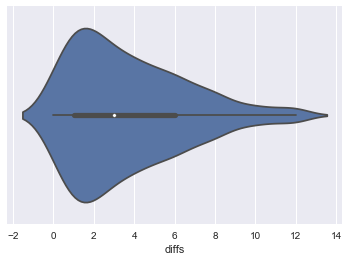

In [164]:
sns.violinplot(diffsIQR.diffs)
#sns.plt.scatter(np.arange(0, len(diffsIQR.diffs)), diffsIQR['diffs'].sort_values())

## List of tumor ages

In [166]:
diffsIQR.sort_values(by=['Low_Neutral_FI', 'Suma_S_IGR_IN'])
#Uncomment the line below to save it as an excel file
#diffsIQR.to_excel('ListOfAges.xlsx')

,Low_Neutral_FI,Suma_S_IGR_IN,Patient_Id,Total_Mutations,diffs
853,2,3,TCGA-AR-A252-01A-11D-A167-09,8,1
861,2,4,TCGA-AO-A03U-01B-21D-A10M-09,6,2
868,2,4,TCGA-AR-A2LQ-01A-22D-A18P-09,4,2
670,2,9,TCGA-A2-A0SU-01A-11D-A099-09,23,7
805,2,9,TCGA-A2-A0T1-01A-21D-A099-09,15,7
828,2,9,TCGA-D8-A1JU-01A-11D-A13L-09,12,7
780,2,11,TCGA-E9-A1RI-01A-11D-A167-09,16,9
869,2,12,TCGA-A2-A1G6-01A-11D-A13L-09,4,10
807,3,3,TCGA-A1-A0SB-01A-11D-A142-09,15,0
850,3,3,TCGA-E2-A1B6-01A-31D-A12Q-09,9,0
